In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [18]:
lung_data = pd.read_csv("survey_lung_cancer.csv")
lung_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [19]:
# Convert 'GENDER' (M → 0, F → 1) and 'LUNG_CANCER' (YES → 1, NO → 0)
lung_data["GENDER"] = lung_data["GENDER"].map({"M": 0, "F": 1})
lung_data["LUNG_CANCER"] = lung_data["LUNG_CANCER"].map({"YES": 1, "NO": 0})
lung_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [20]:
lung_data.shape

(309, 16)

In [21]:
#dependent_variable
x = lung_data.iloc[:,0:-1]
x

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,0,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,0,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [22]:
#independent_variable
y = lung_data["LUNG_CANCER"]
y = y.values.ravel()
y

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [23]:
# Splitting Dataset
dependent_var = lung_data.iloc[:, :-1]  # Features
independent_var = lung_data.iloc[:, -1]  # Target
x_train, x_test, y_train, y_test = train_test_split(dependent_var, independent_var, test_size=1/3, random_state=0)

In [24]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(x_train, y_train)
#Predicting the test set results
prediction1 = log_reg.predict(x_test)
prediction1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
knn.fit(x_train, y_train)
prediction2 = knn.predict(x_test)
prediction2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
# Decision Tree
tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
tree.fit(x_train, y_train)
prediction3 = tree.predict(x_test)
prediction3

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [27]:
# SVM Classifier
svm = OneVsRestClassifier(BaggingClassifier(SVC(C=10, kernel='rbf', random_state=9, probability=True), n_jobs=-1))
svm.fit(x_train, y_train)
prediction4 = svm.predict(x_test)
prediction4

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
# Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)
prediction5 = nb.predict(x_test)
prediction5

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
prediction6 = rf_classifier.predict(x_test)
prediction6

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
# Evaluation Function
def evaluate_model(y_true, y_pred, model_name, results_dict):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Store results in dictionary
    results_dict[model_name] = accuracy  

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

In [31]:
# Dictionary to store accuracy results
accuracy_results = {}

# Evaluate each model
evaluate_model(y_test, prediction1, "Logistic Regression", accuracy_results)
evaluate_model(y_test, prediction2, "KNN", accuracy_results)
evaluate_model(y_test, prediction3, "Decision Tree", accuracy_results)
evaluate_model(y_test, prediction4, "SVM", accuracy_results)
evaluate_model(y_test, prediction5, "Naive Bayes", accuracy_results)
evaluate_model(y_test, prediction6, "Random Forest", accuracy_results)

Logistic Regression Metrics:
Accuracy: 0.9029
Precision: 0.9140
Recall: 0.9770
F1 Score: 0.9444

KNN Metrics:
Accuracy: 0.8738
Precision: 0.8776
Recall: 0.9885
F1 Score: 0.9297

Decision Tree Metrics:
Accuracy: 0.8641
Precision: 0.9195
Recall: 0.9195
F1 Score: 0.9195

SVM Metrics:
Accuracy: 0.8447
Precision: 0.8447
Recall: 1.0000
F1 Score: 0.9158

Naive Bayes Metrics:
Accuracy: 0.8641
Precision: 0.9101
Recall: 0.9310
F1 Score: 0.9205

Random Forest Metrics:
Accuracy: 0.8932
Precision: 0.9043
Recall: 0.9770
F1 Score: 0.9392



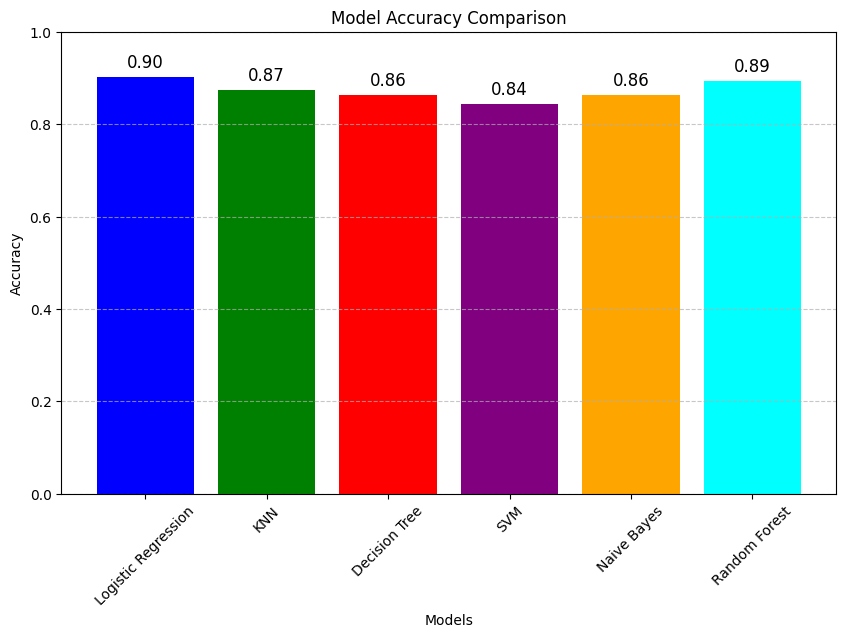

In [32]:
# **Plot Accuracy of All Models**
plt.figure(figsize=(10, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show accuracy values on top of bars
for i, (model, acc) in enumerate(accuracy_results.items()):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12)

plt.show()

In [33]:
# Confusion Matrix Plotting
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

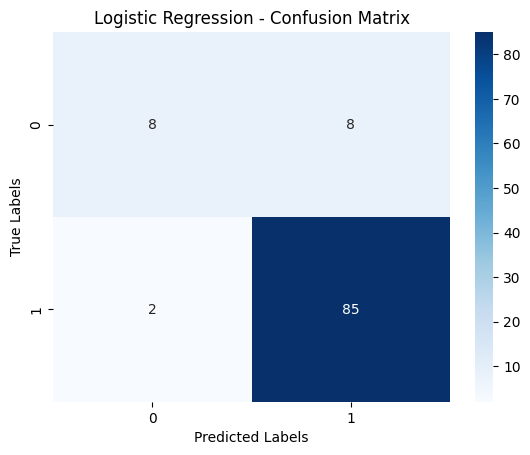

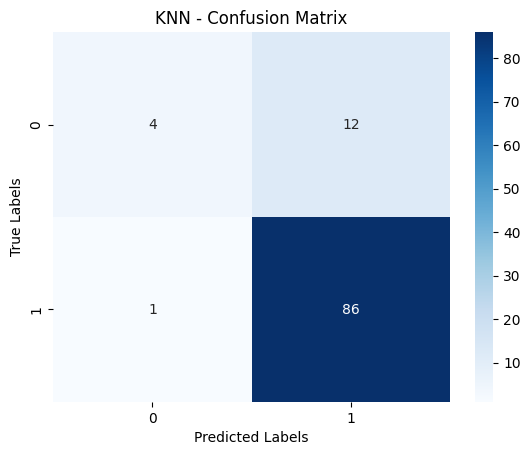

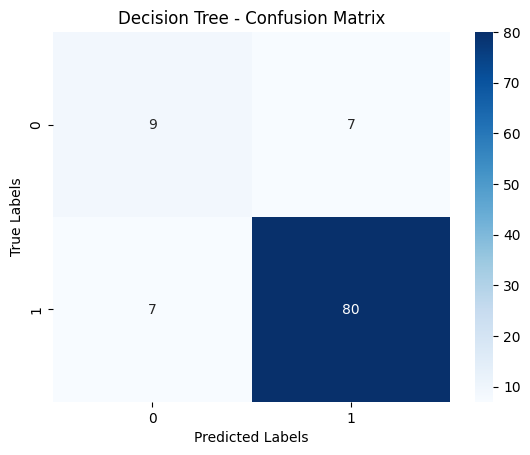

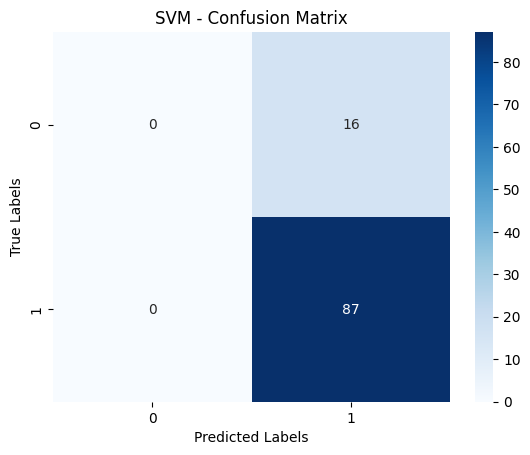

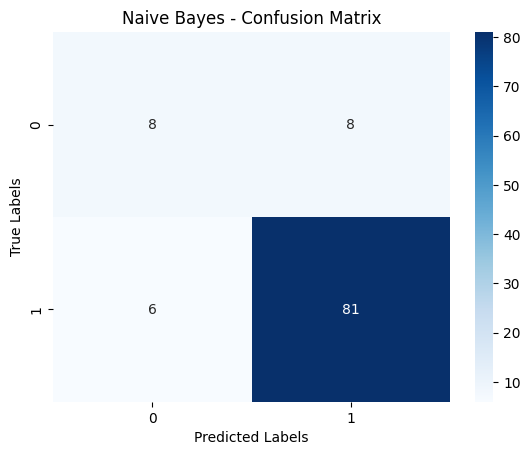

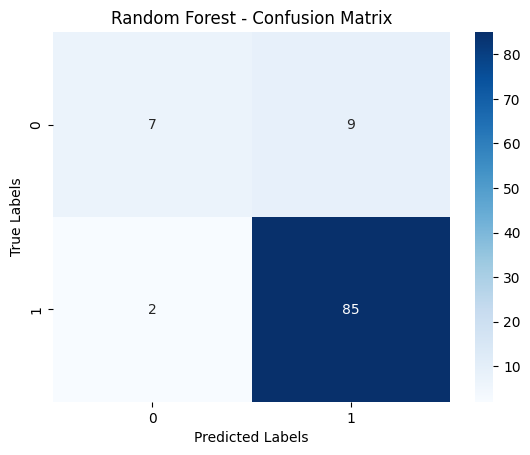

In [34]:
# Confusion Matrix Visualizations
plot_confusion_matrix(y_test, prediction1, "Logistic Regression")
plot_confusion_matrix(y_test, prediction2, "KNN")
plot_confusion_matrix(y_test, prediction3, "Decision Tree")
plot_confusion_matrix(y_test, prediction4, "SVM")
plot_confusion_matrix(y_test, prediction5, "Naive Bayes")
plot_confusion_matrix(y_test, prediction6, "Random Forest")

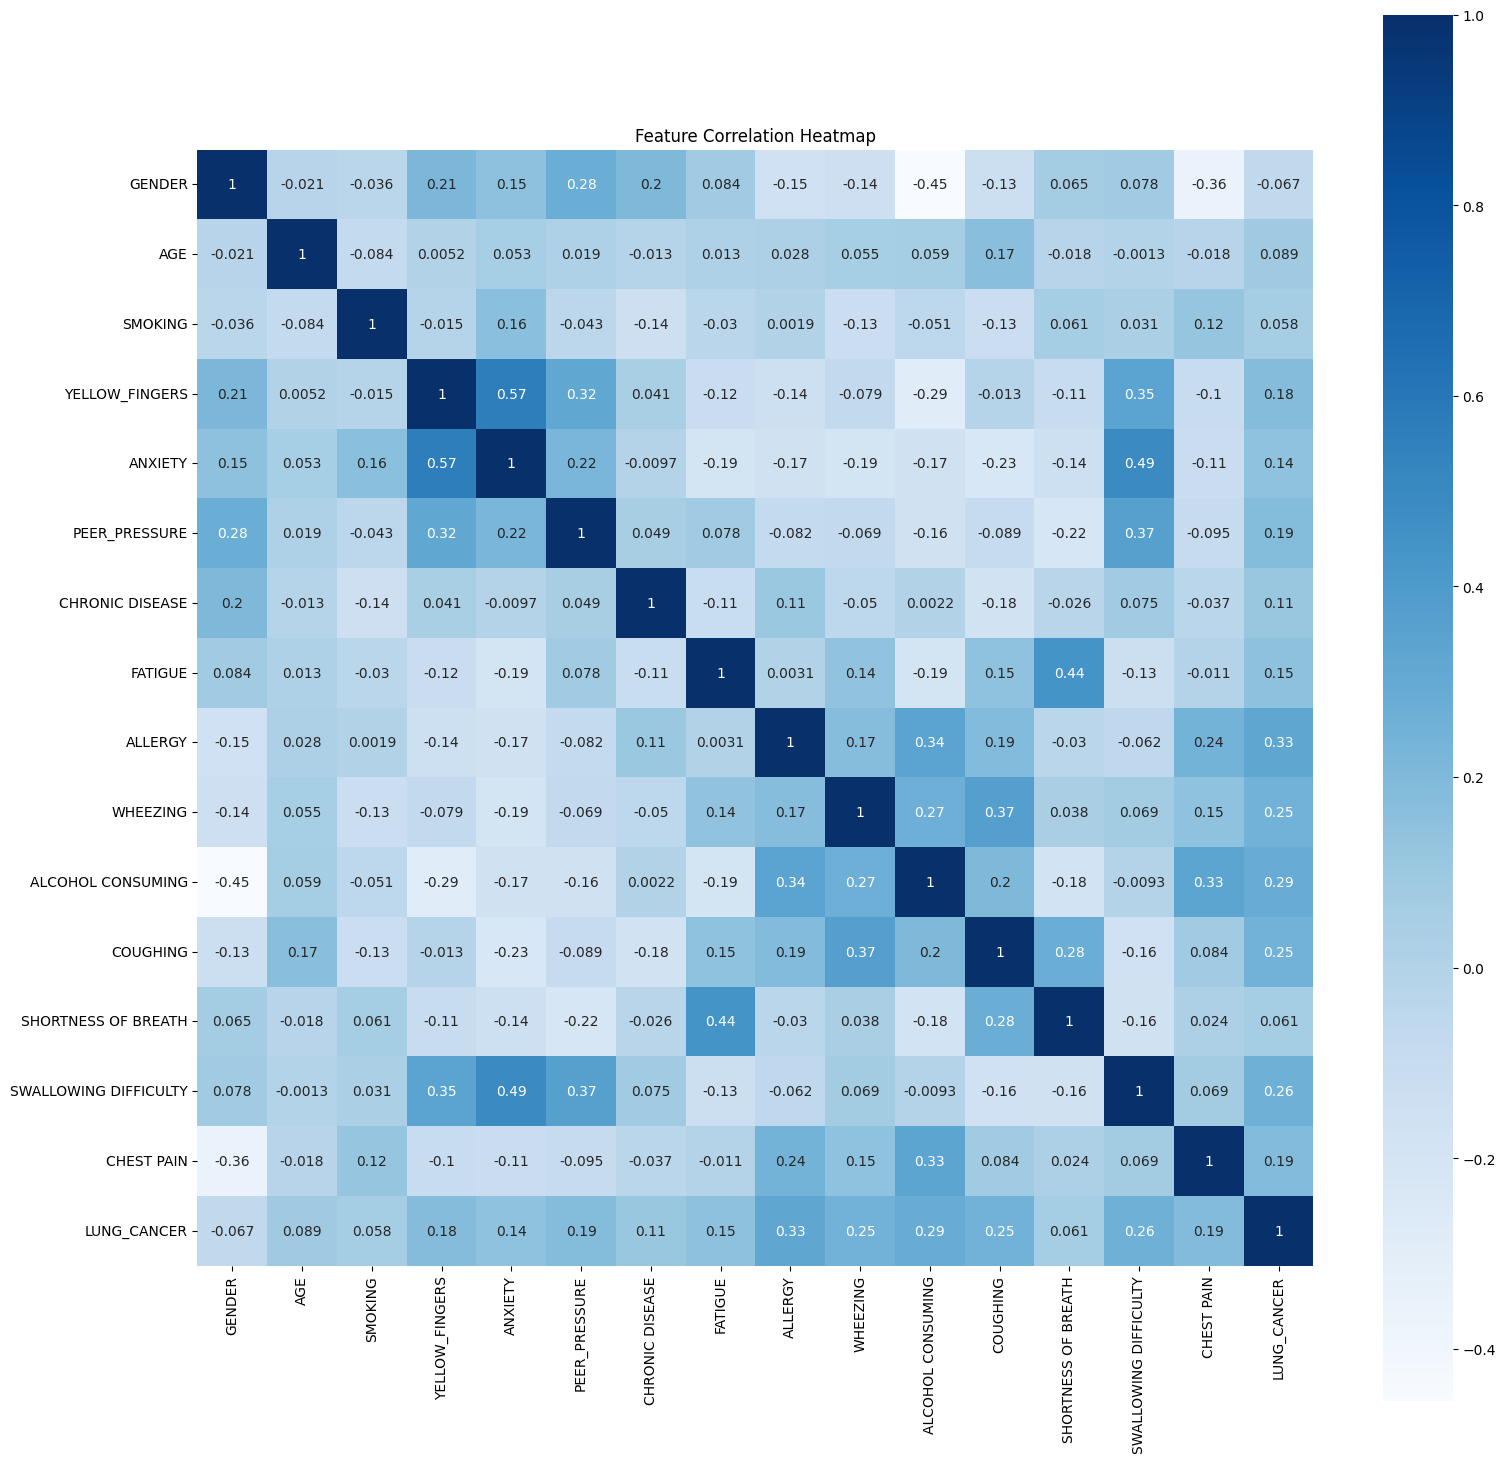

In [35]:
# Correlation Heatmap
correlation = lung_data.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation, cmap="Blues", annot=True, square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

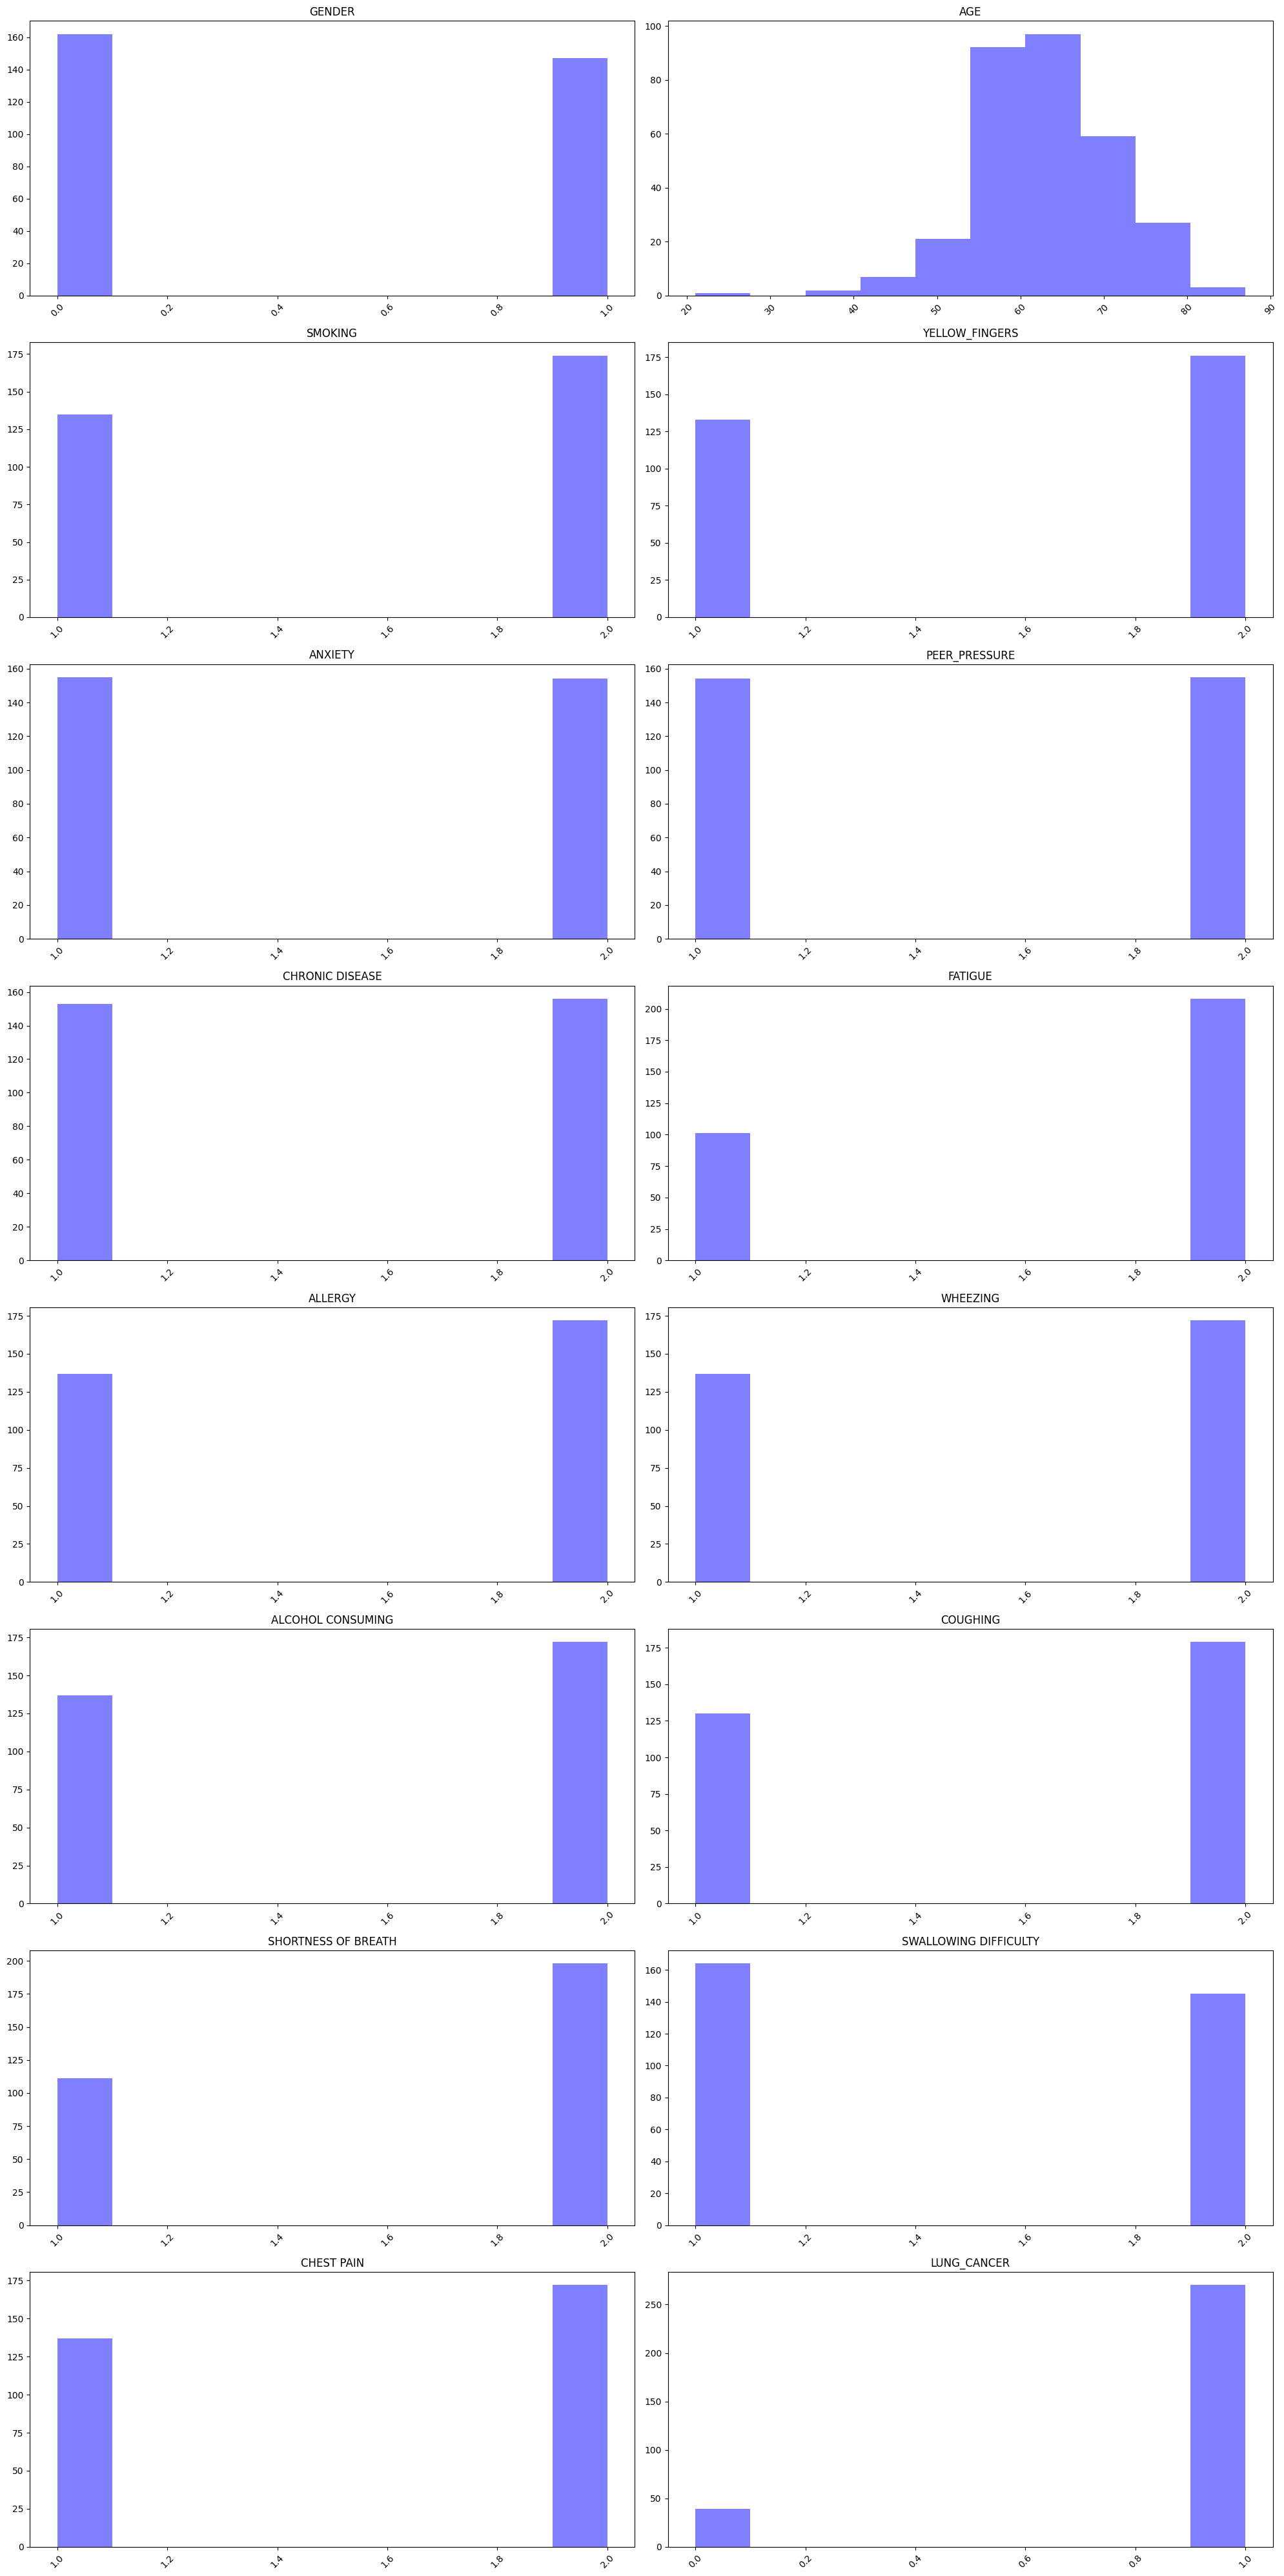

In [36]:
# Feature Distribution
num_list = list(lung_data.columns)
rows = (len(num_list) // 2) + (len(num_list) % 2)
# Set figure size
plt.figure(figsize=(20, 40))
for i in range(len(num_list)):
    plt.subplot(rows, 2, i + 1) 
    plt.title(num_list[i])
    plt.xticks(rotation=45)
    plt.hist(lung_data[num_list[i]], color='blue', alpha=0.5)
plt.tight_layout()
plt.show()